# PART A — Random Walk (Discrete, Transparent, Foundational)
## Problem A1: 1D Symmetric Random Walk

### Model



*   Particle at position $x_n$
*   At each timestep:
$$x_{n+1} = x_n + \eta_n,$$
where $\eta_n ∈ \{+1, -1\} $

### What is random?
*The step direction.

### What you must compute

* Single-trajectory evolution

* Ensemble MSD:

$$\langle (x(t) - x(0))^2 \rangle $$


### What you should expect before coding

* MSD ∝ t

* Distribution of x → Gaussian

Minimal code structure
```
import numpy as np

def random_walk(n_steps):
    steps = np.random.choice([-1, 1], size=n_steps)
    x = np.cumsum(steps)
    return x
```

Then:

### Run 1000 trajectories

*   Compute MSD vs time
*   Plot on log–log scale
*   Modeling insight


Diffusion is not a law — it emerges from randomness + independence.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def random_walk(n_steps):
    steps = np.random.choice([-1, 1], size=n_steps)
    x = np.cumsum(steps)
    return x

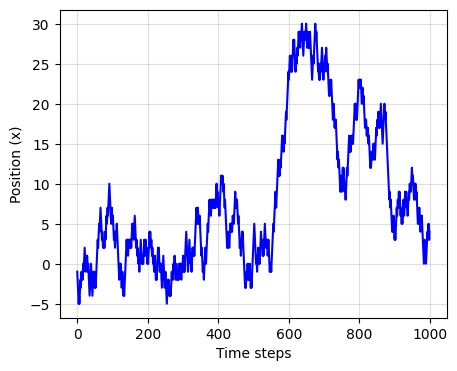

In [ ]:
n_steps = 1000
trajectory = random_walk(n_steps)
moves = np.arange(n_steps)

plt.figure(figsize=(5, 4))
plt.plot(moves, trajectory, color='blue')
plt.xlabel("Time steps")
plt.ylabel("Position (x)")
plt.grid(True, alpha=0.4)
plt.show()

In [ ]:
n_steps = 1000
n_trajectories = 1000

all_trajectories = np.zeros((n_trajectories, n_steps))

for i in range(n_trajectories):
    all_trajectories[i, :] = random_walk(n_steps)

In [ ]:
# Calculate the average trajectory
average_trajectory = np.mean(all_trajectories, axis=0)
moves = np.arange(n_steps)

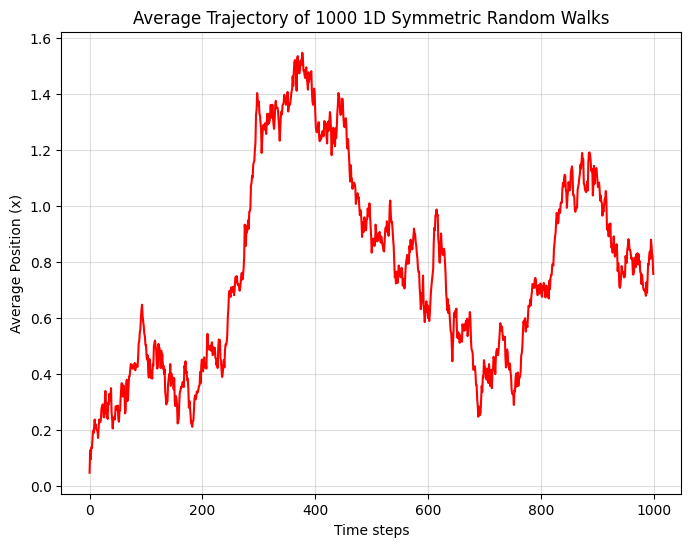

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(moves, average_trajectory, color='red')
plt.xlabel("Time steps")
plt.ylabel("Average Position (x)")
plt.title(f"Average Trajectory of {n_trajectories} 1D Symmetric Random Walks")
plt.grid(True, alpha=0.4)
plt.show()

# Task
Calculate the Mean Squared Displacement (MSD) from the `all_trajectories` data, where the squared displacement for each trajectory at time `t` is `x(t)^2`. Then, compute the theoretical MSD for a 1D symmetric random walk as `t`. Finally, plot both the computed MSD and the theoretical MSD on a single log-log plot for comparison.

## Calculate MSD

### Subtask:
Compute the Mean Squared Displacement from the 'all_trajectories' data. The squared displacement for each trajectory is (x(t) - x(0))^2. Since x(0) is not explicitly stored for each trajectory but the first step is cumsum, x(0) can be considered 0 as the starting point. So, the squared displacement is simply x(t)^2. Then, average these squared displacements across all trajectories for each time step.


In [ ]:
squared_displacement = np.square(all_trajectories)
msd = np.mean(squared_displacement, axis=0)

print("MSD calculated successfully.")

MSD calculated successfully.


## Calculate Theoretical MSD

### Subtask:
Compute the theoretical Mean Squared Displacement for a 1D symmetric random walk. For a 1D symmetric random walk, the theoretical MSD is given by $MSD_{theoretical}(t) = t$.

#### Instructions
1. Create an array representing the theoretical MSD, which will simply be equal to the `moves` array (representing time steps).

In [ ]:
msd_theoretical = moves
print("Theoretical MSD calculated successfully.")

Theoretical MSD calculated successfully.


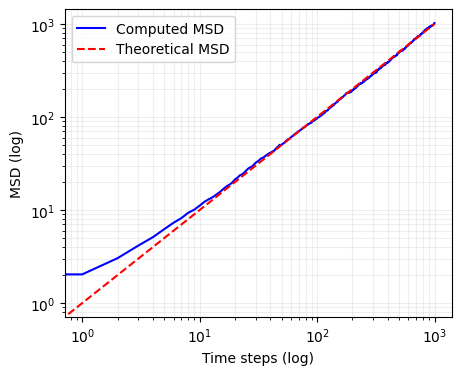

In [ ]:
plt.figure(figsize=(5, 4))
plt.loglog(moves, msd, label='Computed MSD', color='blue')
plt.loglog(moves, msd_theoretical, label='Theoretical MSD', color='red', linestyle='--')

plt.xlabel("Time steps (log)")
plt.ylabel("MSD (log)")
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

Calculate the time-averaged Mean Squared Displacement (TA-MSD) for the first simulated trajectory from `all_trajectories` and plot it against time lags on a log-log scale.

## Select Single Trajectory
Choose one of the simulated trajectories from `all_trajectories` for the time-averaged MSD calculation. The first trajectory `all_trajectories[0]` can be used for this purpose.


In [ ]:
single_trajectory = all_trajectories[0]
print("First trajectory selected successfully.")

First trajectory selected successfully.


## Calculate Time-Averaged Mean Squared Displacement (TA-MSD)

Compute the Time-Averaged Mean Squared Displacement (TA-MSD) for the `single_trajectory`. The TA-MSD for a given time lag $\tau$ is defined as:

$$\text{TA-MSD}(\tau) = \frac{1}{N - \tau} \sum_{t=0}^{N-\tau-1} [x(t+\tau) - x(t)]^2$$

where $N$ is the total number of steps in the trajectory, $x(t)$ is the position at time $t$, and $\tau$ is the time lag.

#### Steps:
1. Define a function `calculate_ta_msd(trajectory, max_lag)` that takes a single trajectory and a maximum time lag as input.
2. Inside the function, iterate through time lags from 1 up to `max_lag`.
3. For each time lag, calculate the squared displacement $[x(t+\tau) - x(t)]^2$ for all possible starting times $t$.
4. Average these squared displacements to get the TA-MSD for that specific time lag.
5. Return an array of TA-MSD values for each time lag.

In [ ]:
def calculate_ta_msd(trajectory, max_lag):
    N = len(trajectory)
    ta_msd_values = []

    for tau in range(1, max_lag + 1):
        if tau >= N:
            # No possible displacements for this tau
            ta_msd_values.append(np.nan)
            continue

        displacements = trajectory[tau:] - trajectory[:-tau]
        squared_displacements = np.square(displacements)
        ta_msd = np.mean(squared_displacements)
        ta_msd_values.append(ta_msd)

    return np.array(ta_msd_values)

print("TA-MSD calculation function defined successfully.")

TA-MSD calculation function defined successfully.


In [ ]:
max_lag = n_steps - 1
ta_msd = calculate_ta_msd(single_trajectory, max_lag)
time_lags = np.arange(1, max_lag + 1)

print("TA-MSD computed successfully for the single trajectory.")

TA-MSD computed successfully for the single trajectory.


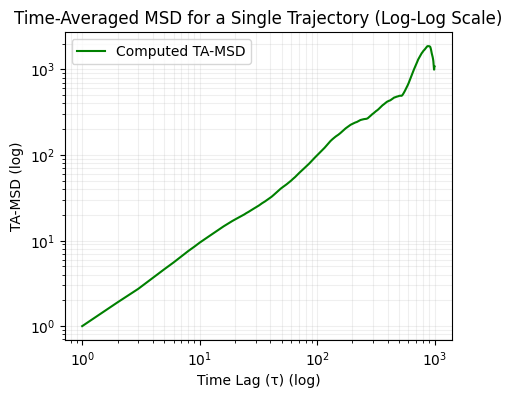

In [ ]:
plt.figure(figsize=(5, 4))
plt.loglog(time_lags, ta_msd, label='Computed TA-MSD', color='green')

plt.xlabel('Time Lag (τ) (log)')
plt.ylabel('TA-MSD (log)')
plt.title('Time-Averaged MSD for a Single Trajectory (Log-Log Scale)')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

## Fit TA-MSD Slope and Plot Comparison

Fit a linear regression to the log-log plot of the TA-MSD to determine the diffusion exponent. Then, plot the computed TA-MSD with the fitted line, and also include the previously calculated Ensemble-Averaged MSD (EA-MSD) on the same log-log plot for direct comparison. Ensure all plots have appropriate labels and a legend.


In [ ]:
from scipy.stats import linregress

print("linregress imported successfully.")

linregress imported successfully.


In [ ]:
valid_indices = ~np.isnan(ta_msd)
log_time_lags = np.log10(time_lags[valid_indices])
log_ta_msd = np.log10(ta_msd[valid_indices])

print("TA-MSD and time lags prepared for log-log regression.")

TA-MSD and time lags prepared for log-log regression.


In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(log_time_lags, log_ta_msd)

print(f"Diffusion exponent (slope): {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print("Linear regression performed successfully.")

Diffusion exponent (slope): 1.1901
Intercept: -0.3907
Linear regression performed successfully.


In [ ]:
fitted_log_ta_msd = slope * log_time_lags + intercept

print("Theoretical fitted line for TA-MSD in log-space calculated successfully.")

Theoretical fitted line for TA-MSD in log-space calculated successfully.


In [ ]:
fitted_ta_msd_linear = np.power(10, fitted_log_ta_msd)

print("Fitted TA-MSD values transformed back to linear space successfully.")

Fitted TA-MSD values transformed back to linear space successfully.


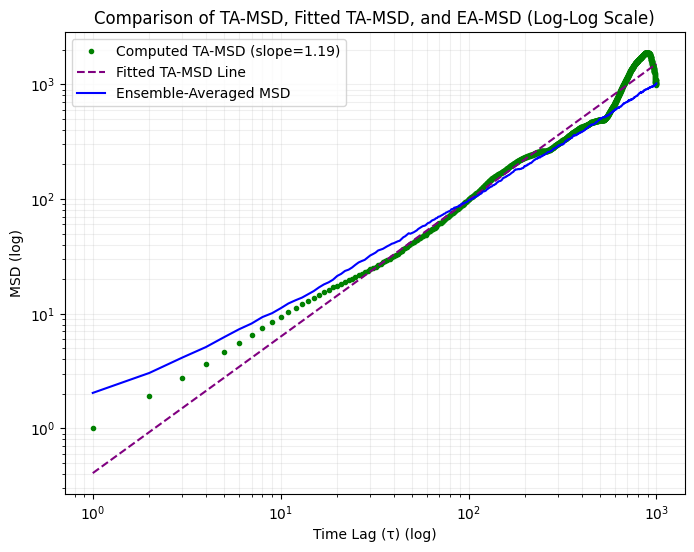

Comparison plot generated successfully.


In [ ]:
plt.figure(figsize=(8, 6))
plt.loglog(time_lags[valid_indices], ta_msd[valid_indices], 'o', label=f'Computed TA-MSD (slope={slope:.2f})', color='green', markersize=3)
plt.loglog(time_lags[valid_indices], fitted_ta_msd_linear, '--', label=f'Fitted TA-MSD Line', color='purple')

# Ensure moves is not empty and has values that can be logged
# Filter out 0 from moves for log-log plot, as log(0) is undefined
valid_msd_indices = moves > 0
plt.loglog(moves[valid_msd_indices], msd[valid_msd_indices], label='Ensemble-Averaged MSD', color='blue')

plt.xlabel('Time Lag (τ) (log)')
plt.ylabel('MSD (log)')
plt.title('Comparison of TA-MSD, Fitted TA-MSD, and EA-MSD (Log-Log Scale)')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

print("Comparison plot generated successfully.")